In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Display settings
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

print("Libraries loaded!")


Libraries loaded!


In [3]:
# Upload your CSV to Colab first (use left-side panel)
df = pd.read_csv("Mall_Customers.csv", encoding='latin1')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
print(df.columns)


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [9]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)


/tmp/ipython-input-10-2965986798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


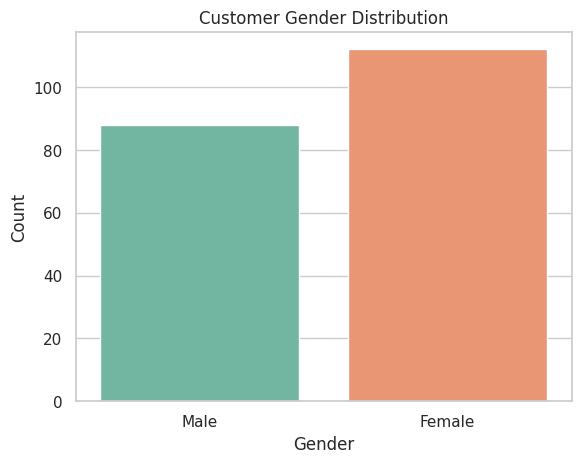

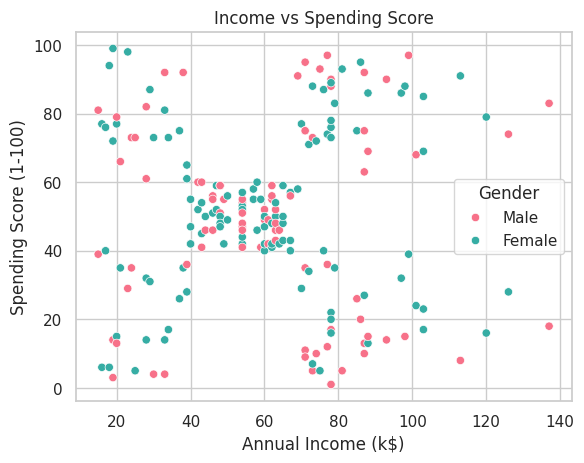

In [10]:
# 📊 Gender Distribution
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 📈 Spending Score vs Annual Income
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='husl')
plt.title("Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



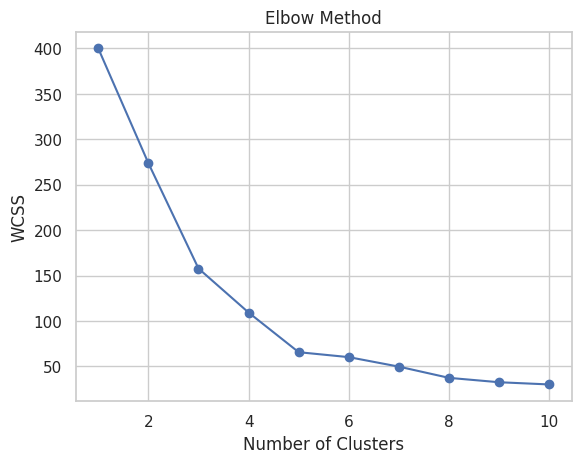

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster info back to the dataframe
df['Cluster'] = y_kmeans


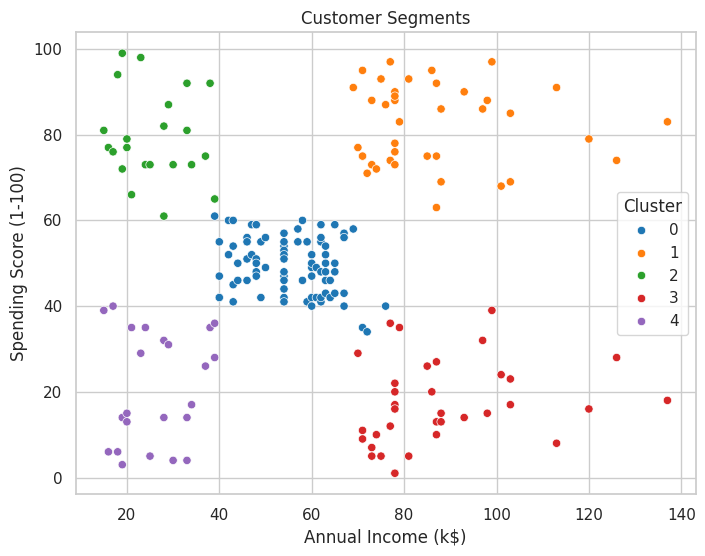

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='tab10', data=df)
plt.title("Customer Segments")
plt.show()


## 🧠 Insights from Customer Segmentation:

- Cluster 0 represents high-income, high-spending customers — ideal for premium or loyalty-based targeting.
- Cluster 2 includes low-income, low-spending individuals — not ideal for aggressive marketing.
- Cluster 4 contains customers with moderate income but high spending scores — a potential growth segment.
- Cluster 3 consists of high-income customers with low spending — they might be interested in premium offers, but need better engagement.
- Cluster 1 shows a younger audience with moderate income and varied spending — they could be targeted through personalized or seasonal promotions.

🎯 These clusters can help the business tailor its marketing strategies and resource allocation for better customer satisfaction and profit.
